In [145]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [146]:
dataset = pd.read_excel('winequality-white.xlsx')

In [147]:
dataset.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [148]:
print(dataset.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [150]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [151]:
len(dataset['quality'].unique())

6

In [152]:
# Preprocessing the data
X = dataset.drop("quality", axis=1)  
y = dataset["quality"]


X = X.values
y = y.values

In [153]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)

In [154]:
X.shape

(1599, 11)

In [155]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [156]:
y.shape

(1599,)

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# Create a simple neural network
import tensorflow as tf

In [159]:
X_train.shape[1]

11

In [160]:
y_train = keras.utils.to_categorical(y_train, 9)
y_test = keras.utils.to_categorical(y_test, 9)

In [161]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = (X_train.shape[1], )))
model.add(tf.keras.layers.Dense(20, activation= 'relu'))
model.add(tf.keras.layers.Dense(20, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation= 'relu', activity_regularizer = tf.keras.regularizers.L2(0.04)))
model.add(tf.keras.layers.Dense(9, activation='softmax'))

In [162]:
# Compile the model
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [163]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 20)                240       
                                                                 
 dense_42 (Dense)            (None, 20)                420       
                                                                 
 dense_43 (Dense)            (None, 10)                210       
                                                                 
 dense_44 (Dense)            (None, 9)                 99        
                                                                 
Total params: 969
Trainable params: 969
Non-trainable params: 0
_________________________________________________________________


In [164]:
# Train the model
hist= model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data = (X_test, y_test))

Epoch 1/25
20/20 [==============================] - 2s 35ms/step - loss: 2.2430 - accuracy: 0.1032 - val_loss: 2.1371 - val_accuracy: 0.2656
Epoch 2/25
20/20 [==============================] - 0s 10ms/step - loss: 2.0548 - accuracy: 0.3729 - val_loss: 1.9658 - val_accuracy: 0.4969
Epoch 3/25
20/20 [==============================] - 0s 7ms/step - loss: 1.8763 - accuracy: 0.4871 - val_loss: 1.7857 - val_accuracy: 0.4906
Epoch 4/25
20/20 [==============================] - 0s 12ms/step - loss: 1.7073 - accuracy: 0.4965 - val_loss: 1.6495 - val_accuracy: 0.5156
Epoch 5/25
20/20 [==============================] - 0s 13ms/step - loss: 1.5874 - accuracy: 0.5379 - val_loss: 1.5577 - val_accuracy: 0.5344
Epoch 6/25
20/20 [==============================] - 0s 14ms/step - loss: 1.5022 - accuracy: 0.5465 - val_loss: 1.4914 - val_accuracy: 0.5219
Epoch 7/25
20/20 [==============================] - 0s 11ms/step - loss: 1.4407 - accuracy: 0.5629 - val_loss: 1.4426 - val_accuracy: 0.5312
Epoch 8/25
20/

In [165]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy}")

10/10 [==============================] - 1s 4ms/step - loss: 1.1423 - accuracy: 0.5719
Test Accuracy: 0.5718749761581421


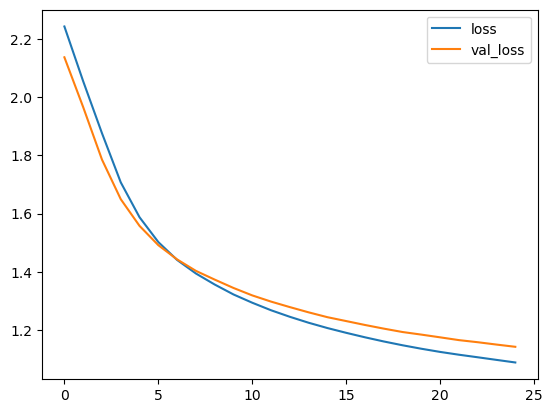

In [166]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()